In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

import warnings
warnings.simplefilter("ignore")

In [2]:
data = pd.read_csv('Language Detection.csv')

In [3]:
data.head(10)

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
5,"[2] In ancient philosophy, natura is mostly us...",English
6,"[3][4] \nThe concept of nature as a whole, the...",English
7,During the advent of modern scientific method ...,English
8,"[5][6] With the Industrial revolution, nature ...",English
9,"However, a vitalist vision of nature, closer t...",English


In [4]:
data["Language"].value_counts()

Language
English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: count, dtype: int64

In [5]:
X = data["Text"]
y = data["Language"]

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [7]:
data_list = []
for text in X:
    text = re.sub(r'[!@#$(),\n"%^*?\:;~`0-9]', ' ', text)
    text = re.sub(r'[[]]', ' ', text)
    text = text.lower()
    data_list.append(text)

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()
X.shape

(10337, 39404)

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [10]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [11]:
y_pred = model.predict(x_test)

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

In [13]:
print("Accuracy is :",ac)

Accuracy is : 0.9816247582205029


In [14]:
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       108
           1       1.00      0.92      0.96        92
           2       1.00      0.98      0.99       117
           3       0.91      1.00      0.95       282
           4       0.97      0.99      0.98       187
           5       1.00      0.99      0.99        95
           6       1.00      0.97      0.99        69
           7       1.00      1.00      1.00         8
           8       1.00      0.99      0.99       134
           9       1.00      1.00      1.00        81
          10       0.99      1.00      1.00       124
          11       1.00      0.99      1.00       154
          12       1.00      0.96      0.98       147
          13       0.98      0.97      0.97       136
          14       0.98      0.99      0.99       131
          15       1.00      1.00      1.00       105
          16       1.00      0.92      0.96        98

    accuracy              

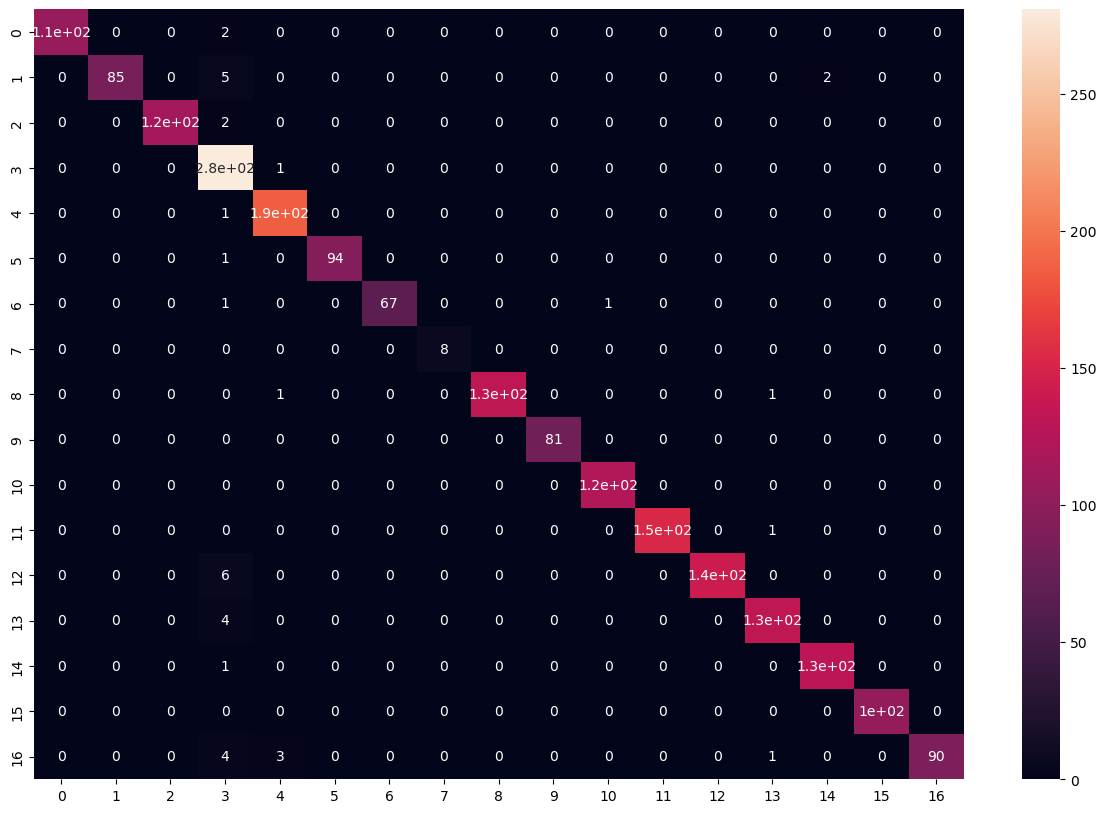

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

In [16]:
def predict(text):
    x=cv.transform([text]).toarray()
    lang=model.predict(x)
    lang=le.inverse_transform(lang)
    print("The language is in",lang[0])

In [17]:
predict("People are awesome")

The language is in English


In [18]:
predict("Descartes rejette la philosophie")

The language is in French
